In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
%matplotlib inline

# Getting the Data

In [2]:
train = pd.read_csv("D:\\IPBA\\Statistical Modelling\\Logistic\\Kaggle\\Titanic\\train.csv")
test = pd.read_csv("D:\\IPBA\\Statistical Modelling\\Logistic\\Kaggle\\Titanic\\test.csv")
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


Merging the two dataframes for analysis and cleaning

In [3]:
df = pd.concat([train , test])
print(df.shape)
df.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA and Data Cleaning

In [4]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

"Survived" has 418 null values , which are from the test dataset . Hence, ignoring.<br>
"Age" , "Fare" & "Embarked" has null values that need to be imputed.<br>
"Cabin" has a lot of null values , hence dropping the variable.<br>
"PassengerId" has no impact on survival , hence dropping the variable.

In [6]:
df = df.drop(['Cabin'] , axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Passenger Class

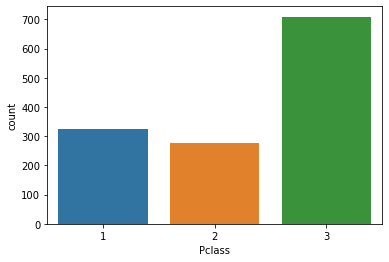

In [7]:
sns.countplot(x='Pclass', data=df)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

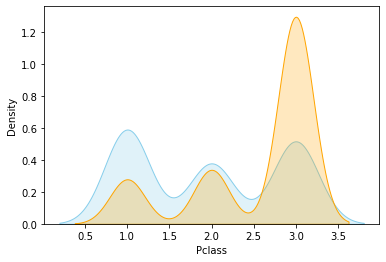

In [8]:
sns.kdeplot(df['Pclass'][df['Survived']==1] , color='skyblue' ,shade=True)
sns.kdeplot(df['Pclass'][df['Survived']==0] , color='orange' ,shade=True)

People in Pclass 1 are more likely to survive

# Sex

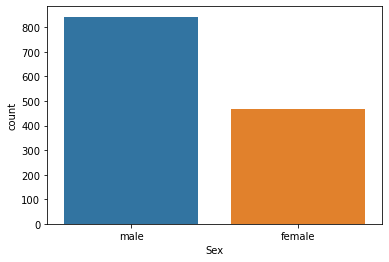

In [9]:
sns.countplot(x='Sex', data=df)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

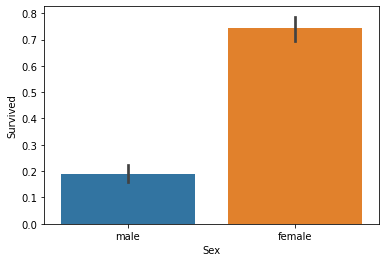

In [10]:
sns.barplot(x='Sex' , y='Survived' , data=df)

Female have a higher chance of surviving.

# Age

In [11]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Density'>

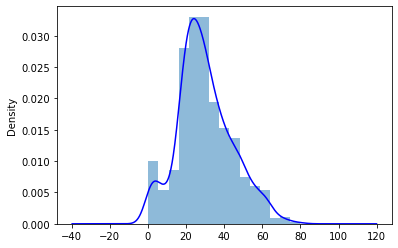

In [12]:
df['Age'].hist(bins=15 , density=True , stacked=True , alpha=0.5)
df['Age'].plot(kind='density' , color='b')

In [13]:
#Imputing Null Values
imp = SimpleImputer(strategy='median')
df['Age'] = imp.fit_transform(df[['Age']])
df['Age'].isnull().sum()

0

<AxesSubplot:ylabel='Density'>

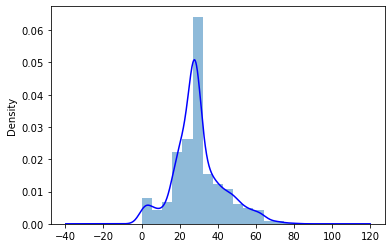

In [14]:
df['Age'].hist(bins=15 , density=True , stacked=True , alpha=0.5)
df['Age'].plot(kind='density' , color='b')

<AxesSubplot:xlabel='Age', ylabel='Density'>

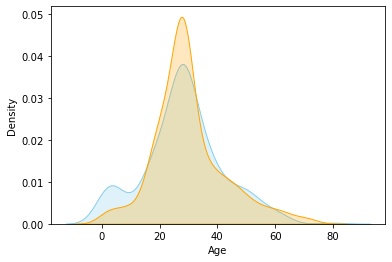

In [15]:
sns.kdeplot(df['Age'][df['Survived']==1] , color='skyblue' ,shade=True)
sns.kdeplot(df['Age'][df['Survived']==0] , color='orange' ,shade=True)

The age has no significant differnce between survivors and the deceased. However , children seem to have survived more. Hence , creating a new variable minor.

# Sibling and Spouse (SibSp)

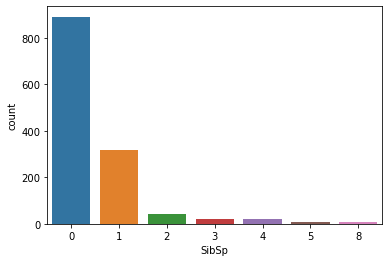

In [16]:
sns.countplot(x='SibSp', data=df)
plt.show()

# Parents & Children (Parch)

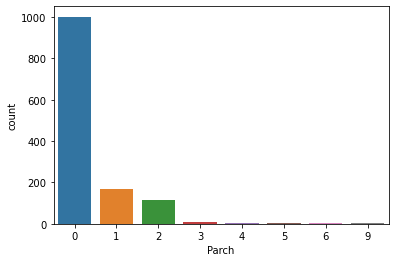

In [17]:
sns.countplot(x='Parch', data=df)
plt.show()

# Fare

In [18]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Density'>

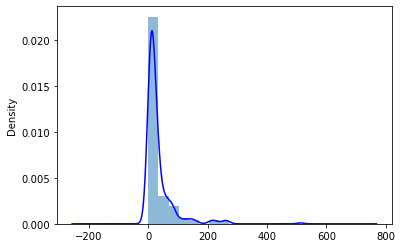

In [19]:
df['Fare'].hist(bins=15 , density=True , stacked=True , alpha=0.5)
df['Fare'].plot(kind='density' , color='b')

In [20]:
#Imputing Null Values
imp = SimpleImputer(strategy='mean')
df['Fare'] = imp.fit_transform(df[['Fare']])
df['Fare'].isnull().sum()

0

<AxesSubplot:ylabel='Density'>

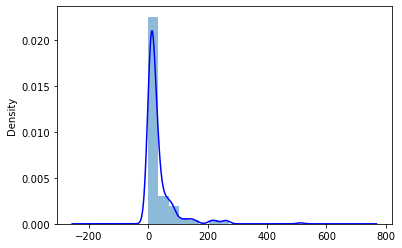

In [21]:
df['Fare'].hist(bins=15 , density=True , stacked=True , alpha=0.5)
df['Fare'].plot(kind='density' , color='b')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

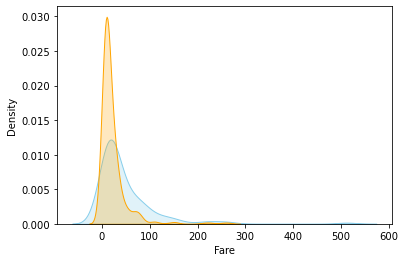

In [22]:
sns.kdeplot(df['Fare'][df['Survived']==1] , color='skyblue' ,shade=True)
sns.kdeplot(df['Fare'][df['Survived']==0] , color='orange' ,shade=True)

Fare is highly significant in determining the survival rate . 

# Embarked

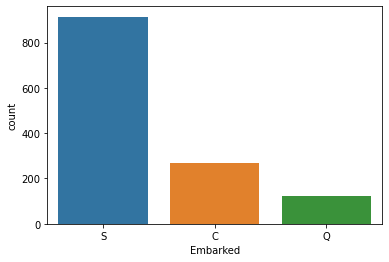

In [23]:
sns.countplot(x='Embarked'  ,data=df)
plt.show()

In [24]:
#Imputing null values with the most frequent value
imp = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imp.fit_transform(df[['Embarked']])
df['Embarked'].isnull().sum()

0

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

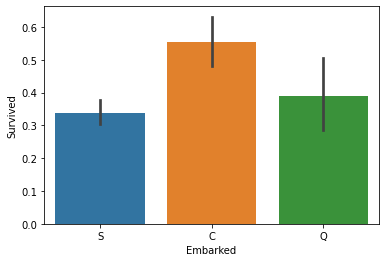

In [25]:
sns.barplot(x='Embarked' , y='Survived' , data=df)

Creating new variable "T_Alone"

In [26]:
df['T_Alone'] = np.where(df['SibSp']+df['Parch'] > 0 , 0 , 1)
df = df.drop(['SibSp' , 'Parch'] , axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,T_Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


<AxesSubplot:xlabel='T_Alone', ylabel='Survived'>

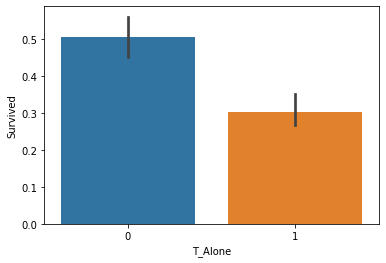

In [27]:
sns.barplot(x='T_Alone' , y='Survived' , data=df)

Creating new variable - Minor

In [28]:
df['Minor'] = np.where(df['Age']<12 , 1 , 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,T_Alone,Minor
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1,0


<AxesSubplot:xlabel='Minor', ylabel='Survived'>

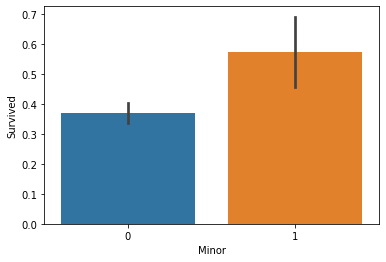

In [29]:
sns.barplot(x='Minor' , y='Survived' , data=df)

Creating Dummies for Pclas , Sex, Embarked, T_Alone and Minor

In [30]:
df = pd.get_dummies(df , columns=['Pclass' , 'Sex' , 'Embarked' , 'T_Alone' , 'Minor'])
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,T_Alone_0,T_Alone_1,Minor_0,Minor_1
0,1,0.0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,0,0,1,1,0,1,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,0,0,1,0,1,0,0,1,0,1,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1,0,1,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,0,1,0,0,0,1,1,0,1,0
4,5,0.0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,1,0,1,0,0,1,0,1,1,0


In [31]:
df = df.rename(columns={'Sex_female' : 'Sex_0',
          'Sex_male' : 'Sex_1'})
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,T_Alone_0,T_Alone_1,Minor_0,Minor_1
0,1,0.0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,0,0,1,1,0,1,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,0,0,1,0,1,0,0,1,0,1,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1,0,1,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,0,1,0,0,0,1,1,0,1,0
4,5,0.0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,1,0,1,0,0,1,0,1,1,0


In [32]:
df.dtypes

PassengerId      int64
Survived       float64
Name            object
Age            float64
Ticket          object
Fare           float64
Pclass_1         uint8
Pclass_2         uint8
Pclass_3         uint8
Sex_0            uint8
Sex_1            uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
T_Alone_0        uint8
T_Alone_1        uint8
Minor_0          uint8
Minor_1          uint8
dtype: object

Splitting the df back into train and test

In [33]:
te = df.loc[df.Survived.isnull()]
tr = df.loc[df.Survived.notnull()]
te = te.drop('Survived' , axis=1)
print(te.shape)
print(tr.shape)

(418, 17)
(891, 18)


In [34]:
tr.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,T_Alone_0,T_Alone_1,Minor_0,Minor_1
0,1,0.0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,0,0,1,1,0,1,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,0,0,1,0,1,0,0,1,0,1,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1,0,1,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,0,1,0,0,0,1,1,0,1,0
4,5,0.0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,1,0,1,0,0,1,0,1,1,0


In [35]:
te.head()

,PassengerId,Name,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,T_Alone_0,T_Alone_1,Minor_0,Minor_1
0,892,"Kelly, Mr. James",34.5,330911,7.8292,0,0,1,0,1,0,1,0,0,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,1,1,0,0,0,1,1,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,0,1,0,0,1,0,1,0,0,1,1,0
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,0,0,1,0,1,0,0,1,0,1,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,1,1,0,0,0,1,1,0,1,0


Splitting the training data into train and test sets

In [36]:
tr_tr , tr_te = train_test_split(tr , test_size=0.2 , random_state=50)

# Fitting the Model

In [37]:
mod1 = smf.glm('Survived~Age+Fare+Pclass_1+Pclass_2+Pclass_3+Sex_0+Sex_1+Embarked_C+Embarked_Q+Embarked_S+T_Alone_0+T_Alone_1+Minor_0+Minor_1' ,
               data=tr_tr , family=sm.families.Binomial())
reg1 = mod1.fit()
prd_prob = reg1.predict(tr_te)
prd1 = reg1.predict(tr_te).map(lambda x: 1 if x>0.5 else 0)
print(reg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      702
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -312.47
Date:                Sun, 25 Jul 2021   Deviance:                       624.94
Time:                        14:27:03   Pearson chi2:                     749.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4024      0.103      3.919      0.0

Fare , Pclass2 , Embarked_c, T_Alone_0 & Minor_0 are not significant in the model

In [39]:
mod2 = smf.glm('Survived~Age+Pclass_1+Pclass_3+Sex_0+Sex_1+Embarked_Q+Embarked_S+T_Alone_1+Minor_1' ,
               data=tr_tr , family=sm.families.Binomial())
reg2 = mod2.fit()
prd2_prob = reg2.predict(tr_te)
prd2 = reg2.predict(tr_te).map(lambda x: 1 if x>0.5 else 0)
print(reg2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -312.49
Date:                Sun, 25 Jul 2021   Deviance:                       624.99
Time:                        14:28:57   Pearson chi2:                     751.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5817      0.309      1.883      0.0

In [40]:
cm = skm.confusion_matrix(tr_te['Survived'] , prd2)
cm

array([[91, 10],
       [26, 52]], dtype=int64)

In [41]:
acc = (cm[0][0]+cm[1][1])/np.sum(cm)
acc

0.7988826815642458

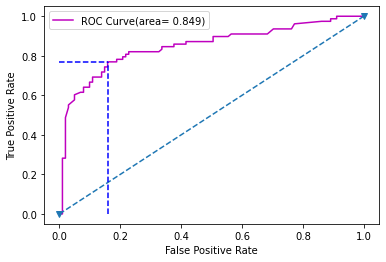

In [42]:
fpr,tpr,thresh = skm.roc_curve(tr_te['Survived'] , prd2_prob)
idx=np.argmax(tpr-fpr)
plt.plot(fpr,tpr , 'm-' , label="ROC Curve(area=% 0.3f)"% skm.auc(fpr,tpr))
plt.plot([0,1] , [0,1] , 'v--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'b--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'b--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [43]:
print("The best threshold is %.3f"% thresh[idx])

The best threshold is 0.384


Using this threshold and checking the accuracy from the confusion matrix

In [56]:
prd = reg2.predict(tr_te).map(lambda x: 1 if x>0.384 else 0)

In [57]:
cm = skm.confusion_matrix(tr_te['Survived'] , prd)
cm

array([[85, 16],
       [18, 60]], dtype=int64)

In [58]:
acc = (cm[0][0]+cm[1][1])/np.sum(cm)
acc

0.8100558659217877

This seems like the better model . Hence using this to create the submission file.

# Making the final Predictions

In [59]:
prd_final = reg2.predict(te).map(lambda x: 1 if x>0.384 else 0)

In [60]:
sub = pd.DataFrame()
sub['PassengerId'] = te['PassengerId']
sub['Survived'] = prd_final
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
sub.to_csv("D:\\IPBA\\Statistical Modelling\\Logistic\\Kaggle\\Titanic\\submission.csv" , index=False)